In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [59]:
image = cv2.imread('images/pizza_bluescreen.jpg') #reading b,g,r

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


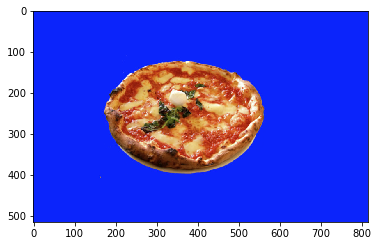

In [60]:
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

In [61]:
# Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background

# Lower treshold
# Lowest values of RGB still consider as part of the bluscreen background
# Setting Red and Green 0, meaning that its okey to have no red or green
# but the value for blue should still be queit high
lower_blue = np.array([0,0,100])
# Upper treshold 
# Allow a little red and green, and the highest value of blue
upper_blue = np.array([100,100,255])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


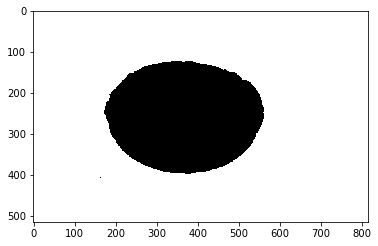

In [62]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
print(mask)

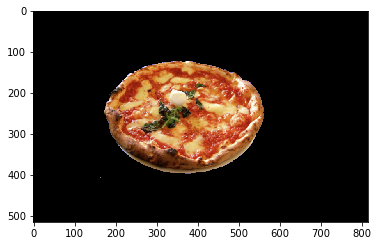

In [63]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

In [64]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

In [65]:
crop_background=cv2.resize(background_image,(816,514))

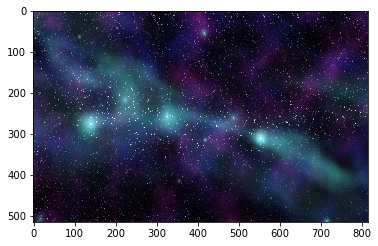

In [66]:
plt.imshow(crop_background)

In [67]:
# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

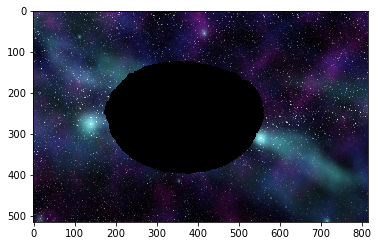

In [68]:
plt.imshow(crop_background)

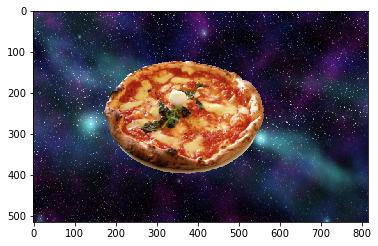

In [75]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)

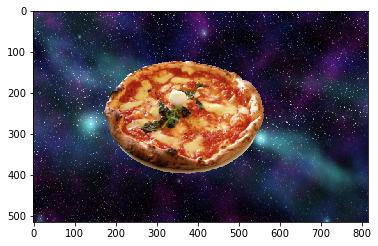

In [79]:

## OTHER WAYS
bitwise_or=cv2.bitwise_or(crop_background,masked_image)
plt.imshow(bitwise_or)